## Loading modules & data

In [ ]:
#! pip install mne
#! pip install scikit-learn

In [28]:
# importing modules
import numpy as np
import mne
import pandas as pd
import helper_functions as hf
import matplotlib.pyplot as plt

# Time-frequency analysis

#### Reading in epochs
The epochs saved in the `ICA.ipynb` is loaded in for analysis. The data has been cleaned using ICA, time-locked to the reaction time and downsampled to 250 Hz.

In [31]:
epochs = mne.read_epochs('Stroop_mouse_EEG_data/epochs/epochs_RT_epo.fif')

Reading /Users/laurapaulsen/Documents/Uni/4th semester/Cognitive neuroscience/EGG_and_mouse_tracking/Stroop_mouse_EEG_data/epochs/epochs_RT_epo.fif ...
    Found the data of interest:
        t =    -700.00 ...     696.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated


Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


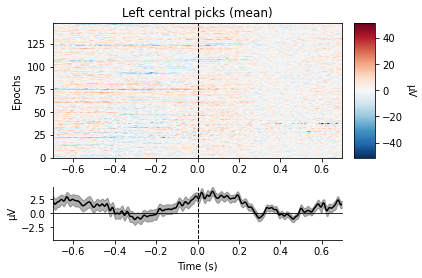

Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


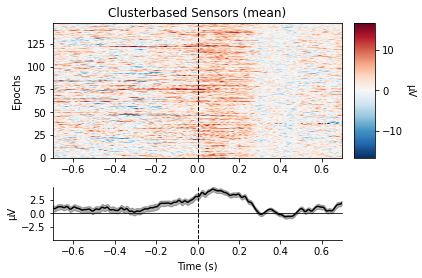

[<Figure size 432x288 with 3 Axes>]

In [32]:
clusterpicks = [1, 5, 6, 7, 10, 11, 12, 16, 17, 21, 22]
leftcentralpicks = [5, 6, 10]
mne.viz.plot_epochs_image(epochs, group_by={'Left central picks' : leftcentralpicks}, combine = 'mean', cmap = 'interactive')
mne.viz.plot_epochs_image(epochs, group_by={'Clusterbased Sensors' : clusterpicks}, combine = 'mean', cmap = 'interactive')

Now lets look into what causes these deflections. This is done by making a time-frequency analysis of the epochs. 

#### Time-Frequency analysis

In [10]:
#freqs = np.logspace(*np.log10([6, 35]), num=12)
freqs = np.arange(8, 16.5, 0.5)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc =  mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: logratio)


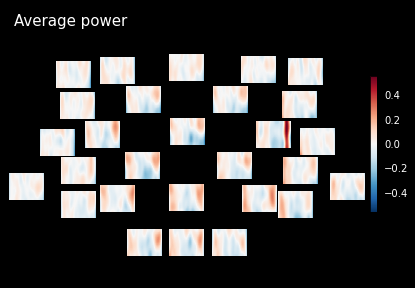

In [11]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power');
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

#### Plotting Alpha waves

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


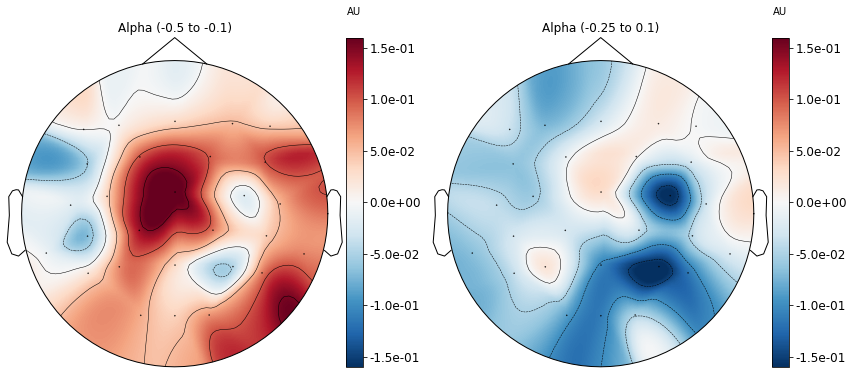

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(12, 12))
power.plot_topomap(ch_type='eeg', tmin=-0.5, tmax=-0.25, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[0],
                   title='Alpha (-0.5 to -0.1)', show=False, vmin = -.16, vmax = .16)

power.plot_topomap(ch_type='eeg', tmin=-0.25, tmax=0.1, fmin=8, fmax=12,
                   baseline=baseline, mode='logratio', axes=axis[1],
                   title='Alpha (-0.25 to 0.1)', show=False, vmin = -.16, vmax = .16)

mne.viz.tight_layout()
plt.show()

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


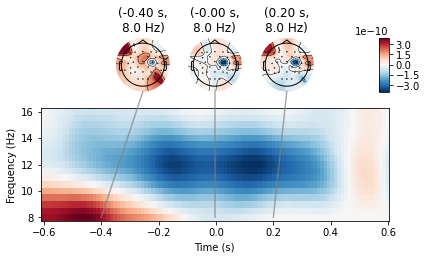

In [13]:
clusterpicks = [1, 5, 6, 7, 10, 11, 12, 16, 17, 21, 22]
leftcentralpicks = [5, 6, 10]
leftmotorpicks = [10, 15] #(LM, C3, C5, CP3, CP5) 
leftpremotor = [5] #Left Premotor (LPM: FC3, FC5),


power.plot_joint(mode='mean', baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.2, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = leftcentralpicks, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = clusterpicks, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = leftmotorpicks, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);
#power.plot_joint(mode='mean', picks = leftpremotor, baseline = (0.4, 0.6), tmin = -.6, tmax = .6, timefreqs=[(0, 8), (0.5, 8), (-0.4, 8)]);


We see that the alpha waves are reduced just before and while the action is done and then rebounds afterwards. alpha waves "locks" a given network in a dominating rhythm, and when this rhythm is supressed it opens up for other processing in the given area (i.e, initiating a motor action).


**Note:**
* Widespread suppression of low-beta (12-18 Hz) - initiation of movement

#### Contrasting across conditions
How to understand this? higher inhibition of motor reponse??? Super interesting if that is the case.


**Link to code:**
https://berdakh.github.io/blog/eeg/jupyter/2020/09/14/MNE-Tutorial-part-2.html#Time-Frequency-stuff

In [14]:
freqs = np.logspace(*np.log10([6, 35]), num=12)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_inc, itc_inc =  mne.time_frequency.tfr_morlet(epochs['cInc'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_con, itc_con =  mne.time_frequency.tfr_morlet(epochs['cCon'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_neu, itc_neu =  mne.time_frequency.tfr_morlet(epochs['cNeu'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)
power_all, itc_all =  mne.time_frequency.tfr_morlet(epochs_tf, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=1)


tfr_contrast = mne.combine_evoked((power_inc, power_con), (1, -1)) #subtraction by passing a negative weight
tfr_contrast.apply_baseline(baseline)

Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.700000, 0.696000], freq : [6.000000, 35.000000], nave : 24, channels : 28, ~965 kB>

#### Comparison of mean power in the conditions

CHECK THAT THESE ARE THE RIGHT FREQUENCIES (alpha)

In [15]:
freq_ind_b = 0
freq_ind_a = 9
time_ind_b = 50
time_ind_a = 300


## averaging over alpha frequencies
average_con = hf.average_power_time(power_con, clusterpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)
average_inc = hf.average_power_time(power_inc, clusterpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)
average_neu = hf.average_power_time(power_neu, clusterpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)


In [16]:
times = power_con.times[time_ind_b:time_ind_a]


Text(0.5, 1.0, 'Average Alpha Power')

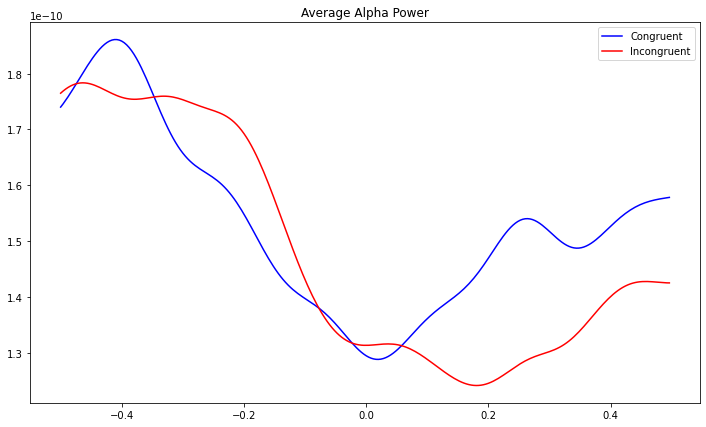

In [17]:
fig, axis = plt.subplots(1, 1, figsize=(12, 7))
plt.plot(times, average_con, 'b', label = 'Congruent')
plt.plot(times, average_inc, 'r', label = 'Incongruent')
#plt.plot(times, average_neu,'g', label = 'Neutral')
plt.legend()
plt.title('Average Alpha Power')

### Analysis: Is there a correlation between the ERD (Event Related Desynchronization) and the incongruency effect of the mouse

To investigate this, we need to quantify the ERD and the incongruency effect. 


#### Incongruency effect
* MAD 
* Maximum deceleration??



In [18]:
# removing rows with incorrect trials
data_mouse_correct = data_mouse[data_mouse['accuracy']==1]
MAD = data_mouse_correct['MAD']

#### ERD

How do we quantify the event related desynchronization? Are there any specific time points we want to look at?

In [19]:
average_all_con = hf.average_power_time(power_all, clusterpicks, freq_ind_b, freq_ind_a, time_ind_b, time_ind_a)
average_all_con.shape

(250,)

In [20]:
len(epochs)

148

The code below calculates the estimate

In [21]:
power_list = []
average_power = []
#min_alpha = []

for i in range(len(epochs)):
    power, itc_all =  mne.time_frequency.tfr_morlet(epochs[i], freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, n_jobs=1)
    powerlist = power_list.append(power)
    
    data = power.data[clusterpicks, freq_ind_b:freq_ind_a, time_ind_b:time_ind_a] 
    average = np.mean(data, axis = 0)
    average = np.mean(average, axis = 0)
    average_power.append(average)
    #min_alpha.append(min(average)

Now lets quantify the measure of the power. In the average power list, we have the average power for each sample in each 

In [22]:
ind_a, ind_b = 74, 125
mean_time_window_power = [np.mean(power[ind_a:ind_b]) for power in average_power]

**Notes**: 

In [24]:
data_mouse.head()

,trial_number,acc_min_time,acc_max_time,onset_image,rt,MAD_time,MAD,accuracy,initiation_time,trial_type
0,1,0.733350,0.650132,31.300117,0.905011,0.733350,0.238700,1,0.583331,incongruent
1,2,0.622053,0.605359,33.730150,1.591102,0.921982,-0.631696,1,0.572032,incongruent
2,3,0.802988,0.736214,36.848743,0.973101,0.719611,0.349800,1,0.652943,congruent
3,4,0.572829,0.506165,39.345931,0.791854,0.622821,-1.068630,1,0.472808,neutral
4,5,0.655069,0.555022,41.664691,0.707068,0.588346,0.331753,1,0.488326,incongruent


In [25]:
print(lm.coef_)
print(lm.intercept_)

NameError: name 'lm' is not defined

# Random notes
* Epochs on initiation time?


Average alpha power in time window from when the mouse started moving until mouse-click